In [1]:
import networkx as nx
from networkx import DiGraph
from vrpy import VehicleRoutingProblem
import matplotlib.pyplot as plt

In [2]:
import math

In [3]:
import time

In [4]:
# Create an empty Directed graph and add the depot as source and sink to the digraph
g = DiGraph()

pos = dict()

In [5]:
g.add_node(1, pos=(5,7))
pos[1] = (5,7)

In [6]:
g.add_node(2, pos=(5,13))
pos[2] = (5,13)

In [7]:
g.add_node(3, pos=(15,7))
pos[3] = (15,7)

In [8]:
g.add_node(4, pos=(15,13))
pos[4] = (15,13)

In [9]:
g = nx.complete_graph([1,2,3,4], create_using=None)
g = g.to_directed()

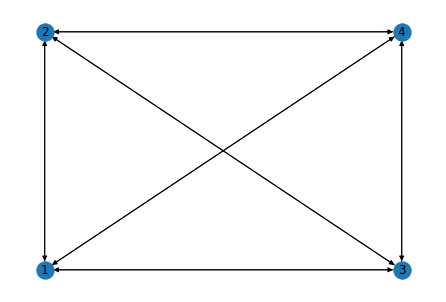

In [10]:
nx.draw(g, pos, with_labels = True)

In [11]:
for i in [1,2,3,4]:    
    # Add demand for this payload
    g.nodes[i]["demand"] = float(1)

In [12]:
for edge in g.edges():
    startnode=edge[0] 
    endnode=edge[1]
    g[startnode][endnode]['cost']=round(math.sqrt(((pos[endnode][1]-pos[startnode][1])**2)+
                                      ((pos[endnode][0]-pos[startnode][0])**2)),2)

In [13]:
depot_loc = (10,10)

g.add_node("Source", pos=depot_loc)
pos["Source"] = depot_loc
# Sink location is same as depo 
g.add_node("Sink", pos=(depot_loc[0],depot_loc[0] + 0))
pos["Sink"] = (depot_loc[0],depot_loc[0] + 0)

for i in [1,2,3,4]:  # Can we assume that payload id's are unique?
    # Add edge to source and sink
    dist = round(math.sqrt(((pos["Source"][1]-pos[i][1])**2)+
                                      ((pos["Source"][0]-pos[i][0])**2)),2)
    print("distance is ", dist)
    g.add_edge(i, "Sink", cost=round(math.sqrt(((pos["Source"][1]-pos[i][1])**2)+
                                      ((pos["Source"][0]-pos[i][0])**2)),2))
    g.add_edge("Source", i, cost=round(math.sqrt(((pos["Source"][1]-pos[i][1])**2)+
                                      ((pos["Source"][0]-pos[i][0])**2)),2))

distance is  5.83
distance is  5.83
distance is  5.83
distance is  5.83


In [14]:
prob = VehicleRoutingProblem(g, load_capacity=2)
# prob.num_vehicles = 4
# prob.time_windows = True

In [15]:
start = time.time()
prob.solve()
end = time.time()
print(end - start, " sec")

INFO:vrpy.vrp:new upper bound : max num stops = 4
INFO:vrpy.vrp:Clarke & Wright solution found with value 35.32 and 2 vehicles
INFO:vrpy.vrp:Greedy solution found with value 35.32 and 2 vehicles
INFO:vrpy.vrp:iteration 0, 35.32
INFO:vrpy.vrp:iteration 1, 35.32
INFO:vrpy.vrp:iteration 2, 35.32
INFO:vrpy.vrp:iteration 3, 35.32
INFO:vrpy.vrp:iteration 4, 35.32
INFO:vrpy.vrp:iteration 5, 35.32
INFO:vrpy.master_solve_pulp:total cost = 35.32


0.276569128036499  sec


In [16]:
prob.best_value

35.32

In [17]:
prob.best_routes

{1: ['Source', 3, 4, 'Sink'], 2: ['Source', 1, 2, 'Sink']}